In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train-perceptron.txt to train-perceptron.txt


**Task 1: Plot all sample points**

In [3]:
#Reading training and testing dataset
df_train = pd.read_csv('train-perceptron.txt', sep=" ",  header = None, dtype = 'float64')
print(df_train)

#converting into numpy array
np_train = df_train.values

     0    1    2
0  1.0  1.0  1.0
1  1.0 -1.0  1.0
2  2.0  2.5  2.0
3  0.0  2.0  2.0
4  2.0  3.0  2.0
5  4.0  5.0  1.0


In [4]:
#separating class
w1 = df_train[df_train[2] == 1]
w2 = df_train[df_train[2] == 2]

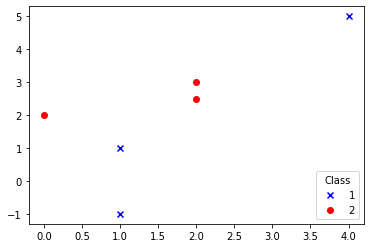

In [6]:
#scatter plot according to the class label
fig, ax = plt.subplots()
ax.scatter(w1[0], w1[1], color='blue', label='1', marker='x')
ax.scatter(w2[0], w2[1], color='red', label='2', marker='o')
ax.legend(title='Class', loc='lower right')
plt.show()

**Task 2: Generate high dimensional sample points and Normalize any of the class**

In [7]:
def phi_function_and_normalization(arr):
    
    x1_2 = arr[0] ** 2
    x2_2 = arr[1] ** 2
    x1 = arr[0]
    x2 = arr[1]
    x1_x2 = x1 * x2
    
    if arr[2] == 1:
        return  np.array([[x1_2, x2_2, x1_x2, x1, x2, 1]])
    else:
        return  np.array([[x1_2, x2_2, x1_x2, x1, x2, 1]]) * -1

In [8]:
#apply phi function and normalization to training samples

#creating empty array
y = np.empty((0,6), float)
   
for i in range(len(np_train)):
    temp = phi_function_and_normalization(np_train[i])
    y = np.append(y, temp, axis = 0)
        
print(y)   

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]
 [16.   25.   20.    4.    5.    1.  ]]


**Task 3: Use Perceptron Algorithm (both one at a time and many at a time) for finding the weight coefficients**

In [9]:
def one_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
    
    while count != len_y:
        itr += 1
        count = 0
        
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                w = w + alpha * y[i]
            else:
                count += 1
 
    return itr 

In [10]:
def many_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
   
    while count != len_y:
        itr += 1
        count = 0
        y_miss = np.zeros((1, y.shape[1]))
       
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                y_miss = y_miss + y[i]
            else:
                count += 1
        w = w + alpha * y_miss
    
    return itr 

**Task 4: Obtain and Visualize the Performance of Different Perceptron algorithm for Different Combination of Weight Initialization, Learning Rate**

In [11]:
np.random.seed(2)

# weight initializations
w_ones = np.ones((1, y.shape[1]))
w_zeros = np.zeros((1, y.shape[1]))
w_random = np.random.random((1, y.shape[1]))

# learning rate 
alphas = np.arange(0.1, 1.1, 0.1)

#list for output
one_ones, one_zeros, one_random, many_ones, many_zeros, many_random = [], [], [], [], [], []

for alpha in alphas:
    one_ones.append( one_at_a_time(y, w_ones, alpha) )
    one_zeros.append( one_at_a_time(y, w_zeros, alpha) )
    one_random.append( one_at_a_time(y, w_random, alpha) )
    many_ones.append( many_at_a_time(y, w_ones, alpha) )
    many_zeros.append( many_at_a_time(y, w_zeros, alpha) )
    many_random.append( many_at_a_time(y, w_random, alpha) )
    
print('one at a time with wights all ones:', one_ones)
print('one at a time with wights all zeros:', one_zeros)
print('one at a time with wights randomly initialized:', one_random)
print('many at a time with wights all ones:', many_ones)
print('many at a time with wights all zeros:', many_zeros)
print('many at a time with wights randomly initialized:', many_random)

one at a time with wights all ones: [6, 147, 149, 149, 141, 157, 136, 136, 140, 141]
one at a time with wights all zeros: [141, 141, 141, 141, 141, 141, 141, 141, 141, 141]
one at a time with wights randomly initialized: [144, 154, 141, 153, 157, 157, 135, 136, 136, 136]
many at a time with wights all ones: [102, 104, 91, 116, 105, 114, 91, 91, 105, 93]
many at a time with wights all zeros: [105, 105, 92, 105, 92, 105, 105, 105, 105, 92]
many at a time with wights randomly initialized: [95, 87, 92, 90, 88, 139, 138, 116, 118, 97]


In [12]:
#function for ploting the bar chart
def plot_bar_chart(x, y1, y2, init_type):
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x, y1, width=0.03, align='center', label='One at a time')
    ax.bar(x+0.03, y2, width=0.03, align='center', label='Many at a time')

    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.title('Perceptron Comparison: '+init_type)
    plt.xticks(x)
    plt.legend()
    plt.show()

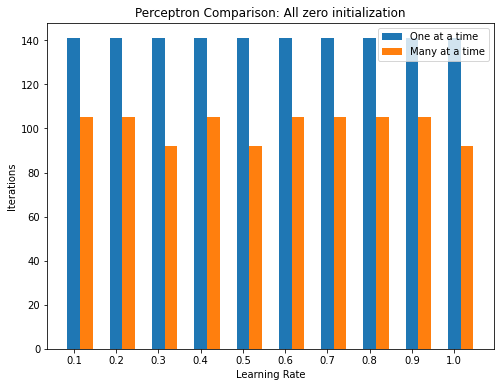

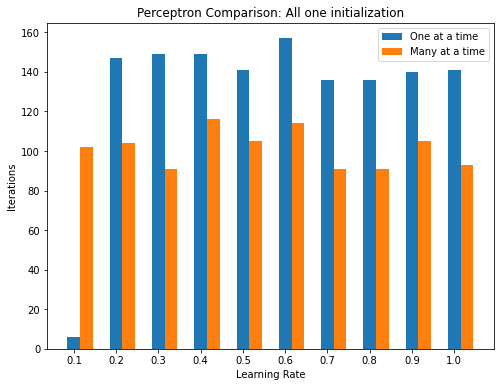

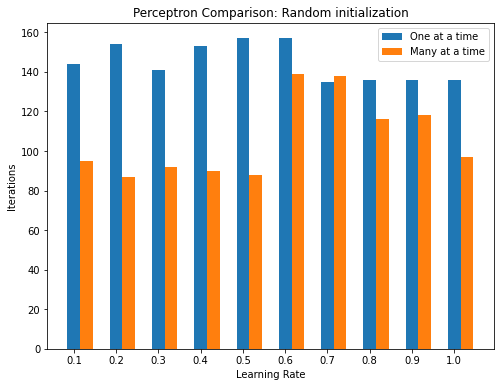

In [13]:
#plotting bar charts

plot_bar_chart(alphas, one_zeros, many_zeros, 'All zero initialization')
plot_bar_chart(alphas, one_ones, many_ones, 'All one initialization')
plot_bar_chart(alphas, one_random, many_random, 'Random initialization')

**Question (a):** 

In Task 2, why do we need to take the sample points to a high dimension?

**Answer:** 

From the image seen while trying to plot the training points, it can be seen that the two classes are quite scattered.
It looks quite imposible to separate the two classes using a **Linear Line**.
So, in order to separate the classes, the sample points were taken to higher points using $\phi$ function.